In [1]:
from Bio import Entrez

In [2]:
Entrez.email = "furkanfbr@gmail.com"
handle = Entrez.einfo()
record = Entrez.read(handle)
print(record["DbList"])

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'ncbisearch', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'biosystems', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']


In [23]:
db = 'pccompound'
compound = 'aspirin'
idList = []
handle = Entrez.esearch(db=db,term=f'{compound}[Synonym]',rettype='xml',retMax=1,sort='relevance')

In [24]:
res  = Entrez.read(handle)
print(res)
idList.extend(res['IdList'])
idList

{'Count': '122', 'RetMax': '1', 'RetStart': '0', 'IdList': ['2244'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'aspirin[Synonym]', 'Field': 'Synonym', 'Count': '122', 'Explode': 'N'}, 'GROUP'], 'QueryTranslation': 'aspirin[Synonym]'}


['2244']

In [25]:
handle = Entrez.elink(db='mesh',dbfrom=db,id=idList,linkname='pccompound_mesh')
result = Entrez.read(handle)
print(result)

[{'ERROR': [], 'LinkSetDb': [{'Link': [{'Id': '68001241'}, {'Id': '68058633'}, {'Id': '68016861'}, {'Id': '68010975'}, {'Id': '68005343'}, {'Id': '68000894'}, {'Id': '68062385'}, {'Id': '68012459'}, {'Id': '68010636'}, {'Id': '68009930'}, {'Id': '68006844'}, {'Id': '68006841'}, {'Id': '68006838'}, {'Id': '68001555'}, {'Id': '68050299'}, {'Id': '68045506'}, {'Id': '68045505'}, {'Id': '68045504'}, {'Id': '68020228'}, {'Id': '68020164'}, {'Id': '68018712'}, {'Id': '68018689'}, {'Id': '68018501'}, {'Id': '68018373'}, {'Id': '68006401'}, {'Id': '68004791'}, {'Id': '68002317'}, {'Id': '68000893'}, {'Id': '68000700'}], 'DbTo': 'mesh', 'LinkName': 'pccompound_mesh'}], 'LinkSetDbHistory': [], 'DbFrom': 'pccompound', 'IdList': ['2244']}]


In [26]:
results = {}
for id,i in zip(idList,result):
    links = {}
    for j in i["LinkSetDb"]:
        for link in j["Link"]:
            links[link['Id']]=''
    if len(links)>0:
        results[id] = links

In [56]:
print(results)
print(list(list(results.values())[0].keys())[0])



{'2244': {'68001241': '', '68058633': '', '68016861': '', '68010975': '', '68005343': '', '68000894': '', '68062385': '', '68012459': '', '68010636': '', '68009930': '', '68006844': '', '68006841': '', '68006838': '', '68001555': '', '68050299': '', '68045506': '', '68045505': '', '68045504': '', '68020228': '', '68020164': '', '68018712': '', '68018689': '', '68018501': '', '68018373': '', '68006401': '', '68004791': '', '68002317': '', '68000893': '', '68000700': ''}}
68001241


{'68001241': '', '68058633': '', '68016861': '', '68010975': '', '68005343': '', '68000894': '', '68062385': '', '68012459': '', '68010636': '', '68009930': '', '68006844': '', '68006841': '', '68006838': '', '68001555': '', '68050299': '', '68045506': '', '68045505': '', '68045504': '', '68020228': '', '68020164': '', '68018712': '', '68018689': '', '68018501': '', '68018373': '', '68006401': '', '68004791': '', '68002317': '', '68000893': '', '68000700': ''}


In [57]:
restest = Entrez.efetch(db='mesh',id=list(list(results.values())[0].keys())[0],retmode='xml',rettype='xml')
res = restest.read()
res

'\n1: Aspirin\nThe prototypical analgesic used in the treatment of mild to moderate pain. It has\nanti-inflammatory and antipyretic properties and acts as an inhibitor of\ncyclooxygenase which results in the inhibition of the biosynthesis of\nprostaglandins. Aspirin also inhibits platelet aggregation and is used in the\nprevention of arterial and venous thrombosis. (From Martindale, The Extra\nPharmacopoeia, 30th ed, p5)\nYear introduced: 1965\n\nSubheadings:\n    administration and dosage\n    adverse effects\n    agonists\n    analogs and derivatives\n    analysis\n    antagonists and inhibitors\n    blood\n    cerebrospinal fluid\n    chemical synthesis\n    chemistry\n    classification\n    economics\n    etiology\n    history\n    immunology\n    isolation and purification\n    metabolism\n    organization and administration\n    pharmacokinetics\n    pharmacology\n    physiology\n    poisoning\n    radiation effects\n    standards\n    statistics and numerical data\n    supply a

In [58]:
res

'\n1: Aspirin\nThe prototypical analgesic used in the treatment of mild to moderate pain. It has\nanti-inflammatory and antipyretic properties and acts as an inhibitor of\ncyclooxygenase which results in the inhibition of the biosynthesis of\nprostaglandins. Aspirin also inhibits platelet aggregation and is used in the\nprevention of arterial and venous thrombosis. (From Martindale, The Extra\nPharmacopoeia, 30th ed, p5)\nYear introduced: 1965\n\nSubheadings:\n    administration and dosage\n    adverse effects\n    agonists\n    analogs and derivatives\n    analysis\n    antagonists and inhibitors\n    blood\n    cerebrospinal fluid\n    chemical synthesis\n    chemistry\n    classification\n    economics\n    etiology\n    history\n    immunology\n    isolation and purification\n    metabolism\n    organization and administration\n    pharmacokinetics\n    pharmacology\n    physiology\n    poisoning\n    radiation effects\n    standards\n    statistics and numerical data\n    supply a

In [59]:
t = res.split('\n\n\n')
del t[-1]

In [60]:
t

['\n1: Aspirin\nThe prototypical analgesic used in the treatment of mild to moderate pain. It has\nanti-inflammatory and antipyretic properties and acts as an inhibitor of\ncyclooxygenase which results in the inhibition of the biosynthesis of\nprostaglandins. Aspirin also inhibits platelet aggregation and is used in the\nprevention of arterial and venous thrombosis. (From Martindale, The Extra\nPharmacopoeia, 30th ed, p5)\nYear introduced: 1965\n\nSubheadings:\n    administration and dosage\n    adverse effects\n    agonists\n    analogs and derivatives\n    analysis\n    antagonists and inhibitors\n    blood\n    cerebrospinal fluid\n    chemical synthesis\n    chemistry\n    classification\n    economics\n    etiology\n    history\n    immunology\n    isolation and purification\n    metabolism\n    organization and administration\n    pharmacokinetics\n    pharmacology\n    physiology\n    poisoning\n    radiation effects\n    standards\n    statistics and numerical data\n    supply 

In [15]:
print(len(results['2244'].keys()))
# print(res)
dict(zip(idList,t))

29


{'2244': '\n1: Aspirin\nThe prototypical analgesic used in the treatment of mild to moderate pain. It has\nanti-inflammatory and antipyretic properties and acts as an inhibitor of\ncyclooxygenase which results in the inhibition of the biosynthesis of\nprostaglandins. Aspirin also inhibits platelet aggregation and is used in the\nprevention of arterial and venous thrombosis. (From Martindale, The Extra\nPharmacopoeia, 30th ed, p5)\nYear introduced: 1965\n\nSubheadings:\n    administration and dosage\n    adverse effects\n    agonists\n    analogs and derivatives\n    analysis\n    antagonists and inhibitors\n    blood\n    cerebrospinal fluid\n    chemical synthesis\n    chemistry\n    classification\n    economics\n    etiology\n    history\n    immunology\n    isolation and purification\n    metabolism\n    organization and administration\n    pharmacokinetics\n    pharmacology\n    physiology\n    poisoning\n    radiation effects\n    standards\n    statistics and numerical data\n   

In [63]:
results.items()

dict_items([('2244', {'68001241': '\n1: Aspirin\nThe prototypical analgesic used in the treatment of mild to moderate pain. It has\nanti-inflammatory and antipyretic properties and acts as an inhibitor of\ncyclooxygenase which results in the inhibition of the biosynthesis of\nprostaglandins. Aspirin also inhibits platelet aggregation and is used in the\nprevention of arterial and venous thrombosis. (From Martindale, The Extra\nPharmacopoeia, 30th ed, p5)\nYear introduced: 1965\n\nSubheadings:\n    administration and dosage\n    adverse effects\n    agonists\n    analogs and derivatives\n    analysis\n    antagonists and inhibitors\n    blood\n    cerebrospinal fluid\n    chemical synthesis\n    chemistry\n    classification\n    economics\n    etiology\n    history\n    immunology\n    isolation and purification\n    metabolism\n    organization and administration\n    pharmacokinetics\n    pharmacology\n    physiology\n    poisoning\n    radiation effects\n    standards\n    statistic

In [69]:
for k,v in results.items():
    for id in list(v.keys())[0]:
        handle = Entrez.efetch(db='mesh',id=id,retmode='xml',rettype='xml')
        # print(handle.read())
        result = handle.read()
        # list_of_terms = result.split('\n\n\n')
        # del list_of_terms[-1]
        # print(list_of_terms)
        results[k][id] = result

HTTPError: HTTP Error 400: Bad Request

In [70]:
print(results)

{'2244': {'68001241': '\n1: Aspirin\nThe prototypical analgesic used in the treatment of mild to moderate pain. It has\nanti-inflammatory and antipyretic properties and acts as an inhibitor of\ncyclooxygenase which results in the inhibition of the biosynthesis of\nprostaglandins. Aspirin also inhibits platelet aggregation and is used in the\nprevention of arterial and venous thrombosis. (From Martindale, The Extra\nPharmacopoeia, 30th ed, p5)\nYear introduced: 1965\n\nSubheadings:\n    administration and dosage\n    adverse effects\n    agonists\n    analogs and derivatives\n    analysis\n    antagonists and inhibitors\n    blood\n    cerebrospinal fluid\n    chemical synthesis\n    chemistry\n    classification\n    economics\n    etiology\n    history\n    immunology\n    isolation and purification\n    metabolism\n    organization and administration\n    pharmacokinetics\n    pharmacology\n    physiology\n    poisoning\n    radiation effects\n    standards\n    statistics and numeri

In [197]:
# info = dict(zip(links,list_of_terms))

{'67006687': '\n1: aspririn, bamethan, escin drug combination [Supplementary Concept]\ncombination of aspirin, Bamethan, & aescin used in treatment of thrombophlebitis\nDate introduced: January 1, 1974\nRegistry Number: 77124-31-3\nHeading Mapped to:\n    Aspirin\n    Drug Combinations\n    Escin\n    Ethanolamines\n    Phenethylamines\n\nEntry Terms:\n    Bayro Vas\n    aspririn - bamethan - escin\n\nPrevious Indexing:\n    BAMETHAN (74-94)\n    SAPONINS (74-75)',
 '68062385': '2: Hydroxybenzoates\nBenzoate derivatives substituted by one or more hydroxy groups in any position on\nthe benzene ring.\nYear introduced: 2013\n\nSubheadings:\n    administration and dosage\n    adverse effects\n    agonists\n    analogs and derivatives\n    analysis\n    antagonists and inhibitors\n    biosynthesis\n    blood\n    cerebrospinal fluid\n    chemical synthesis\n    chemistry\n    classification\n    economics\n    etiology\n    history\n    immunology\n    isolation and purification\n    metabo

In [202]:
len(idList)

10

In [1]:
db = 'pccompound'
compound = 'aspirin'
idList = []
handle = Entrez.esearch(db=db,term=f'"{compound}"[Synonym]',rettype='xml',retMax=10,sort='relevance')
res  = Entrez.read(handle)
print(res['IdList'])
'2244'

NameError: name 'Entrez' is not defined

In [311]:
handle = Entrez.elink(db='mesh',dbfrom=db,id='2244',linkname='pccompound_mesh')
result_mesh_id = Entrez.read(handle)

[{'LinkSetDb': [{'Link': [{'Id': '68001241'}, {'Id': '68058633'}, {'Id': '68016861'}, {'Id': '68010975'}, {'Id': '68005343'}, {'Id': '68000894'}, {'Id': '68062385'}, {'Id': '68012459'}, {'Id': '68010636'}, {'Id': '68009930'}, {'Id': '68006844'}, {'Id': '68006841'}, {'Id': '68006838'}, {'Id': '68001555'}, {'Id': '68050299'}, {'Id': '68045506'}, {'Id': '68045505'}, {'Id': '68045504'}, {'Id': '68020228'}, {'Id': '68020164'}, {'Id': '68018712'}, {'Id': '68018689'}, {'Id': '68018501'}, {'Id': '68018373'}, {'Id': '68006401'}, {'Id': '68004791'}, {'Id': '68002317'}, {'Id': '68000893'}, {'Id': '68000700'}], 'DbTo': 'mesh', 'LinkName': 'pccompound_mesh'}], 'ERROR': [], 'LinkSetDbHistory': [], 'DbFrom': 'pccompound', 'IdList': ['2244']}]


In [324]:
mesh_id= [i['Id'] for i in result_mesh_id[0]['LinkSetDb'][0]['Link']]

In [325]:
mesh_id

['68001241',
 '68058633',
 '68016861',
 '68010975',
 '68005343',
 '68000894',
 '68062385',
 '68012459',
 '68010636',
 '68009930',
 '68006844',
 '68006841',
 '68006838',
 '68001555',
 '68050299',
 '68045506',
 '68045505',
 '68045504',
 '68020228',
 '68020164',
 '68018712',
 '68018689',
 '68018501',
 '68018373',
 '68006401',
 '68004791',
 '68002317',
 '68000893',
 '68000700']

In [327]:
handle = Entrez.efetch(db='mesh',id=mesh_id,retmode='xml',rettype='full')
result = handle.read()

['\n1: Aspirin\nThe prototypical analgesic used in the treatment of mild to moderate pain. It has\nanti-inflammatory and antipyretic properties and acts as an inhibitor of\ncyclooxygenase which results in the inhibition of the biosynthesis of\nprostaglandins. Aspirin also inhibits platelet aggregation and is used in the\nprevention of arterial and venous thrombosis. (From Martindale, The Extra\nPharmacopoeia, 30th ed, p5)\nYear introduced: 1965\n\nSubheadings:\n    administration and dosage\n    adverse effects\n    agonists\n    analogs and derivatives\n    analysis\n    antagonists and inhibitors\n    blood\n    cerebrospinal fluid\n    chemical synthesis\n    chemistry\n    classification\n    economics\n    etiology\n    history\n    immunology\n    isolation and purification\n    metabolism\n    organization and administration\n    pharmacokinetics\n    pharmacology\n    physiology\n    poisoning\n    radiation effects\n    standards\n    statistics and numerical data\n    supply 

In [ ]:
print(result.split('\n\n\n'))

In [349]:
ex = result.split('\n\n\n')[0]

In [347]:
import re
match = re.search(r'\bEntry Terms:',ex[0])
match

0

In [258]:
'\n'.join(result)

'\n1: Aspirin\nThe prototypical analgesic used in the treatment of mild to moderate pain. It has\nanti-inflammatory and antipyretic properties and acts as an inhibitor of\ncyclooxygenase which results in the inhibition of the biosynthesis of\nprostaglandins. Aspirin also inhibits platelet aggregation and is used in the\nprevention of arterial and venous thrombosis. (From Martindale, The Extra\nPharmacopoeia, 30th ed, p5)\nYear introduced: 1965\n\nSubheadings:\n    administration and dosage\n    adverse effects\n    agonists\n    analogs and derivatives\n    analysis\n    antagonists and inhibitors\n    blood\n    cerebrospinal fluid\n    chemical synthesis\n    chemistry\n    classification\n    economics\n    etiology\n    history\n    immunology\n    isolation and purification\n    metabolism\n    organization and administration\n    pharmacokinetics\n    pharmacology\n    physiology\n    poisoning\n    radiation effects\n    standards\n    statistics and numerical data\n    supply a

In [351]:
match = re.search(r'\bEntry Terms:\n',ex).span()[1]
ex[match:].split('\n\n')[0].strip()

'Acetylsalicylic Acid\n    Acid, Acetylsalicylic\n    2-(Acetyloxy)benzoic Acid\n    Acylpyrin\n    Aloxiprimum\n    Colfarit\n    Dispril\n    Easprin\n    Ecotrin\n    Endosprin\n    Magnecyl\n    Micristin\n    Polopirin\n    Polopiryna\n    Solprin\n    Solupsan\n    Zorprin\n    Acetysal'

In [29]:
def fetch_projects():
    import requests
    import json
    url =  "https://api.gdc.cancer.gov/projects"
    # The 'fields' parameter is passed as a comma-separated string of single names.
    fields = [
            "project.project_id"
        ]

    fields = ','.join(fields)

    params = {
        # "fields": fields,
        # "format": "TSV",
        "from":"0",
        "size": "1000"
        }

    response = requests.get(url, params = params)
    data = response.json() # Check the JSON Response Content documentation below
    # print(json.dumps(data, indent=4, sort_keys=True))

    project_ids = [i['project_id'] for i in data['data']['hits'] if i['project_id'].startswith("TCGA")]
    return project_ids
fetch_projects()

['TCGA-UCEC',
 'TCGA-LGG',
 'TCGA-SARC',
 'TCGA-PAAD',
 'TCGA-ESCA',
 'TCGA-PRAD',
 'TCGA-LAML',
 'TCGA-KIRC',
 'TCGA-PCPG',
 'TCGA-HNSC',
 'TCGA-OV',
 'TCGA-GBM',
 'TCGA-UCS',
 'TCGA-MESO',
 'TCGA-TGCT',
 'TCGA-KICH',
 'TCGA-READ',
 'TCGA-UVM',
 'TCGA-THCA',
 'TCGA-LIHC',
 'TCGA-THYM',
 'TCGA-CHOL',
 'TCGA-DLBC',
 'TCGA-KIRP',
 'TCGA-BLCA',
 'TCGA-BRCA',
 'TCGA-COAD',
 'TCGA-CESC',
 'TCGA-LUSC',
 'TCGA-STAD',
 'TCGA-SKCM',
 'TCGA-LUAD',
 'TCGA-ACC']

In [7]:
from main import PubChemCompound
import pandas as pd
import numpy as np
data = pd.read_csv('temp.csv').replace(to_replace='nan', value=np.nan).dropna(subset=['drug_name']).sort_values(by=['days_to_death'],
                                                                        ascending=True).to_dict('list')
pc = PubChemCompound()
data['c_id'], data['term'] = pc.get_pick(data['drug_name'])

['doxetaxol', 'irinotecan', 'cyc-116/cyclocel']


In [13]:
pdData = pd.DataFrame.from_dict(data).dropna(subset=['term'])

In [15]:
filter_vals = ['Carboplatin','transplatin [Supplementary Concept]']
pdData=pdData[pdData['term'].isin(filter_vals)]

In [11]:
pdData['term'][0]

'Carboplatin'

In [16]:
pdData

,bcr_patient_barcode,drug_name,therapy_types,project,tobacco_smoking_history,days_to_death,c_id,term
0,TCGA-64-5775,Carboplatin,Chemotherapy,TCGA-LUAD,Smoking,62.0,426756,Carboplatin
2,TCGA-MP-A4TC,Cisplatin,Chemotherapy,TCGA-LUAD,Smoking,74.0,5702198,transplatin [Supplementary Concept]
3,TCGA-MP-A4TC,Cisplatin,Chemotherapy,TCGA-LUAD,Smoking,74.0,5702198,transplatin [Supplementary Concept]
4,TCGA-MP-A4TC,Cisplatin,Chemotherapy,TCGA-LUAD,Smoking,74.0,5702198,transplatin [Supplementary Concept]
5,TCGA-MP-A4TC,Cisplatin,Chemotherapy,TCGA-LUAD,Smoking,74.0,5702198,transplatin [Supplementary Concept]
...,...,...,...,...,...,...,...,...
652,TCGA-L9-A743,CISPLATIN,Chemotherapy,TCGA-LUAD,Smoking,NaN,5702198,transplatin [Supplementary Concept]
653,TCGA-L9-A743,CISPLATIN,Chemotherapy,TCGA-LUAD,Smoking,NaN,5702198,transplatin [Supplementary Concept]
654,TCGA-L9-A7SV,cisplatin,Chemotherapy,TCGA-LUAD,Smoking,NaN,5702198,transplatin [Supplementary Concept]
656,TCGA-NJ-A7XG,Cisplatin,Chemotherapy,TCGA-LUAD,Smoking,NaN,5702198,transplatin [Supplementary Concept]


In [17]:
def survived(x):
    return x.isnull().sum()
def mean_survived(x):
    return np.mean(x)
def smoking(x):
    return x[x=='Smoking'].count()
def survived_n_smoking(x):
    return x[x=='Smoking'].count()

In [18]:
ex = pdData[['therapy_types','days_to_death','tobacco_smoking_history','term']].groupby("term")

In [19]:
aggs = {'days_to_death':survived,'tobacco_smoking_history':smoking}
ex2 = ex.agg(aggs)
ex2.columns = ['survived','smoking']
print(ex2)

                                     survived  smoking
term                                                  
Carboplatin                              93.0      105
transplatin [Supplementary Concept]     117.0      125


<AxesSubplot:xlabel='term'>

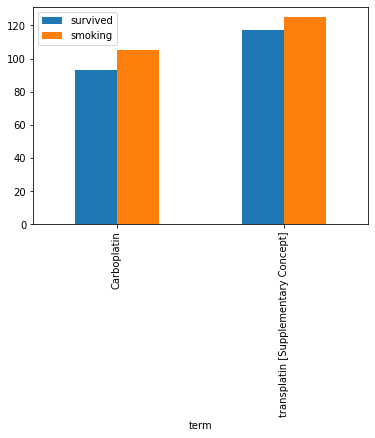

In [20]:
ex2.plot(kind='bar')

<AxesSubplot:xlabel='term,therapy_types'>

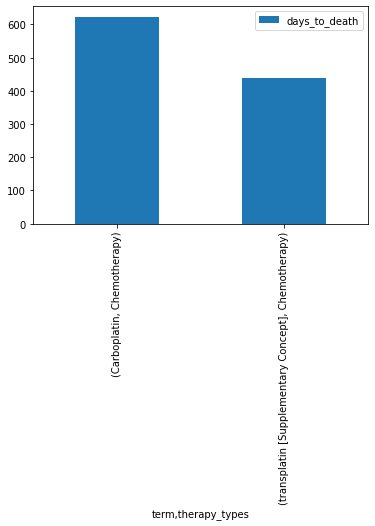

In [21]:
pdData[['therapy_types','days_to_death','term']].groupby(['term','therapy_types']).agg(mean_survived).sort_values('days_to_death',ascending=False).plot(kind='bar')

In [22]:
ex2['survived']

term
Carboplatin                             93.0
transplatin [Supplementary Concept]    117.0
Name: survived, dtype: float64